# Análisis bivariado: Edad vs Sharpness

Selección de variables:
- Variable 1 (num): `true_age` — variable objetivo que se busca predecir.
- Variable 2 (num): `sharpness` — medida de la nitidez de la imagen.

Justificación:
- La nitidez de la imagen (sharpness) puede afectar la calidad de la información visual usada para estimar la edad. Si existe relación entre `sharpness` y `true_age` (directa o indirecta), esto puede influir en el desempeño del modelo de predicción de edad o sugerir que conviene filtrar/ponderar imágenes por nitidez.
- Objetivo del análisis: explorar la existencia y dirección de la relación entre edad y sharpness, cuantificarla (correlaciones y regresión) y observar patrones visuales. Si la relación existe, propondremos pasos para mitigarlo o utilizarla como feature.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr

sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-paper')

#### Exploración general del dataset

In [32]:
df = pd.read_csv("demo_faces.csv")
print("Dimensiones del DataFrame:", df.shape)
print(df.head())
print(df.info())

Dimensiones del DataFrame: (420, 10)
   true_age  pred_age  error_pct   sharpness  blur      haze  face_area  \
0        67      74.2  10.692007   95.627130     1  0.295987       8030   
1        43      41.1   4.373228  111.293125     4  0.334095      11077   
2        59      59.2   0.291838   66.966927     2  0.094719       5985   
3        55      59.3   7.796279   69.114813     0  0.635800      10836   
4        45      47.9   6.432586   68.022421     4  0.670173       7695   

   image_width  image_height  image_pixels  
0          800           480        384000  
1          640           768        491520  
2         1280           480        614400  
3          480           960        460800  
4          800           768        614400  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   true_age      420 non-null    int64  
 1   pre

#### Limpieza y preparación de datos

No existen valores nulos

In [33]:
edad_data = df['true_age']
sharpness_data = df['sharpness']

print("Estadísticas de Edad:")
print(edad_data.describe())
print("\nEstadísticas de Sharpness:")
print(sharpness_data.describe())

Estadísticas de Edad:
count    420.000000
mean      43.011905
std       15.766717
min       15.000000
25%       30.750000
50%       43.000000
75%       56.250000
max       69.000000
Name: true_age, dtype: float64

Estadísticas de Sharpness:
count    420.000000
mean      79.978979
std       24.453451
min        5.000000
25%       64.934785
50%       80.821218
75%       95.856889
max      159.471342
Name: sharpness, dtype: float64


#### Análisis de Correlación


Correlación de Pearson entre Edad y Sharpness: 0.0498
P-valor (Pearson): 0.3091

Correlación de Spearman entre Edad y Sharpness: 0.0294
P-valor (Spearman): 0.5480


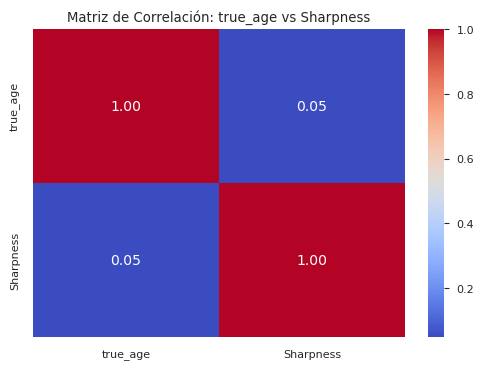

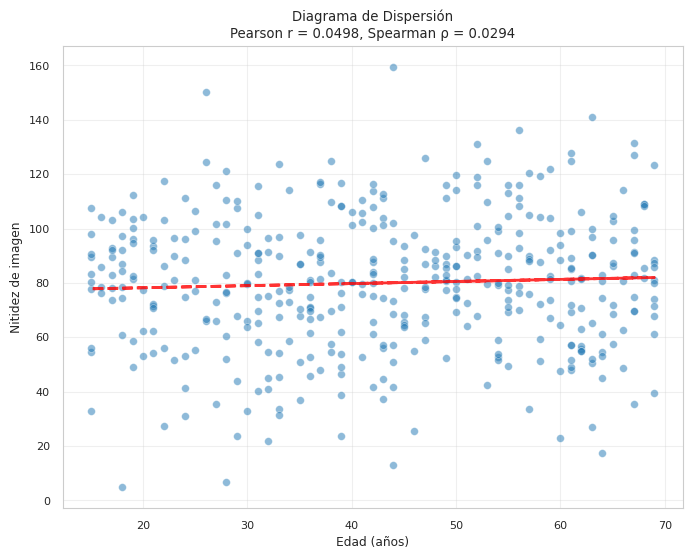

In [34]:
# Análisis de Correlación
# Correlación de Pearson
correlation_pearson = edad_data.corr(sharpness_data)
pearson_corr, pearson_pvalue = pearsonr(edad_data, sharpness_data)

# Correlación de Spearman
spearman_corr, spearman_pvalue = spearmanr(edad_data, sharpness_data)

print(f"\nCorrelación de Pearson entre Edad y Sharpness: {correlation_pearson:.4f}")
print(f"P-valor (Pearson): {pearson_pvalue:.4f}")
print(f"\nCorrelación de Spearman entre Edad y Sharpness: {spearman_corr:.4f}")
print(f"P-valor (Spearman): {spearman_pvalue:.4f}")

# heatmap de correlación
plt.figure(figsize=(6, 4))
corr_matrix = np.corrcoef(edad_data, sharpness_data)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=['true_age', 'Sharpness'], yticklabels=['true_age', 'Sharpness'])
plt.title('Matriz de Correlación: true_age vs Sharpness')
plt.show()

# Visualización de la Correlación con linea de regresión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=edad_data, y=sharpness_data, alpha=0.5)
# Ajuste de línea de regresión
slope, intercept, r_value, p_value, std_err = stats.linregress(edad_data, sharpness_data)
p = np.poly1d([slope, intercept])
plt.plot(edad_data, p(edad_data), "r--", alpha=0.8, linewidth=2)
plt.xlabel('Edad (años)')
plt.ylabel('Nitidez de imagen')
plt.title(f'Diagrama de Dispersión\nPearson r = {correlation_pearson:.4f}, Spearman ρ = {spearman_corr:.4f}')
plt.grid(True, alpha=0.3)
plt.show()

#### Conclusiones

**1. Resumen de los hallazgos clave del análisis:**

Correlación muy débil: Tanto la correlación de Pearson (r = 0.0498) como la de Spearman (ρ = 0.0294) indican una relación prácticamente inexistente entre la edad y la nitidez de imagen.

No significancia estadística: Los p-valores obtenidos (Pearson: 0.3091, Spearman: 0.5480) están muy por encima del umbral de significancia típico (α = 0.05), indicando que no existe evidencia estadística de una relación real entre las variables.

Distribución dispersa: El diagrama de dispersión muestra una nube de puntos sin patrón aparente, con la línea de regresión prácticamente horizontal, confirmando la ausencia de relación lineal.

**2. Impacto de la relación en el contexto del conjunto de datos:**

Independencia de variables: La ausencia de correlación sugiere que la nitidez de imagen no está influenciada por la edad de las personas fotografiadas, lo cual es esperado desde una perspectiva técnica.

Implicaciones para el modelo predictivo: Esta falta de correlación indica que la nitidez no debería introducir sesgos relacionados con la edad en el modelo de predicción. La calidad técnica de la imagen parece ser independiente de las características demográficas.

Validez del dataset: La distribución independiente de la nitidez respecto a la edad sugiere que el conjunto de datos no tiene sesgos sistemáticos donde, por ejemplo, las imágenes de personas mayores tiendan a ser menos nítidas.

**3. Posibles hipótesis y próximos pasos para análisis más profundo:**

Hipótesis para investigar:
- H1: La nitidez podría correlacionarse con el error de predicción del modelo más que con la edad real
- H2: Otras variables técnicas (blur, haze, resolución) podrían tener mayor impacto en la predicción de edad
- H3: La nitidez podría ser un factor de calidad que, independientemente de la edad, afecte la confiabilidad de las predicciones